### Análise de gastos  parlamentares 


<img src='https://www.mdb.org.br/wp-content/uploads/2019/02/img20190201105325851.jpg'>

No Brasil, os parlamentares contam com um benefício conhecido como cota parlamentar, que é um valor em dinheiro destinado a custear despesas relacionadas ao exercício do mandato. Essas despesas podem incluir gastos com transporte, hospedagem, alimentação, material de escritório, entre outros.

Embora o objetivo da cota parlamentar seja auxiliar os parlamentares em suas atividades legislativas, existem casos em que esses recursos são utilizados de forma questionável. Há relatos de gastos excessivos com alimentação e hospedagem em hotéis de luxo, bem como compras de produtos e serviços que não têm relação com as atividades parlamentares.

Esses gastos controversos geraram críticas por parte da sociedade, que muitas vezes questiona a ética e a transparência dos representantes eleitos. Para garantir a transparência na utilização dos recursos da cota parlamentar, é importante que haja uma fiscalização rigorosa por parte dos órgãos responsáveis, bem como uma prestação de contas clara e detalhada por parte dos parlamentares.

A política brasileira é marcada por escândulos de corrupção e mal uso do dinheiro público. Dessa forma, cabe a nós, cidadões, o acompanhamento e fiscalização dos gastos de nossos candidatos.

Será que o seu candidato está utilizando com responsabilidade e repeito o dinheiro público? Essas e outras informações podem ser obtidas facilmente atráves de dados abertos disponibilizados na internet. Nesse sentido, este projeto visa realizar uma análise  sobre os gastos de deputados federais durante o ano de 2019 .

### Importaçao dos dados e bibliotecas

In [146]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np 
pd.set_option('display.max_columns', 500)

In [147]:
df = pd.read_csv('Ano-2019.csv',sep=';')
df.head()

,txNomeParlamentar,cpf,ideCadastro,nuCarteiraParlamentar,nuLegislatura,sgUF,sgPartido,codLegislatura,numSubCota,txtDescricao,numEspecificacaoSubCota,txtDescricaoEspecificacao,txtFornecedor,txtCNPJCPF,txtNumero,indTipoDocumento,datEmissao,vlrDocumento,vlrGlosa,vlrLiquido,numMes,numAno,numParcela,txtPassageiro,txtTrecho,numLote,numRessarcimento,vlrRestituicao,nuDeputadoId,ideDocumento,urlDocumento
0,LID.GOV-CD,NaN,NaN,NaN,2015,NaN,NaN,55,13,FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR,0,NaN,CRISTIANE FERREIRA EPP,037.139.030/0010-8,693,4,2019-01-16T00:00:00,111.30,0.0,111.30,1,2019,0,NaN,NaN,1554246,NaN,NaN,2812,6738121,https://www.camara.leg.br/cota-parlamentar/not...
1,LID.GOV-CD,NaN,NaN,NaN,2019,NaN,NaN,56,13,FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR,0,NaN,CRISTIANE FERREIRA EPP,037.139.030/0010-8,716,4,2019-02-04T00:00:00,117.19,0.0,117.19,2,2019,0,NaN,NaN,1570078,NaN,NaN,2812,6769606,https://www.camara.leg.br/cota-parlamentar/not...
2,LID.GOV-CD,NaN,NaN,NaN,2019,NaN,NaN,56,13,FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR,0,NaN,CRISTIANE FERREIRA EPP,037.139.030/0010-8,723,4,2019-02-25T00:00:00,120.15,0.0,120.15,2,2019,0,NaN,NaN,1570503,NaN,NaN,2812,6771099,https://www.camara.leg.br/cota-parlamentar/not...
3,LID.GOV-CD,NaN,NaN,NaN,2019,NaN,NaN,56,13,FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR,0,NaN,CRISTIANE FERREIRA EPP,037.139.030/0010-8,753,4,2019-03-28T00:00:00,151.18,0.0,151.18,3,2019,0,NaN,NaN,1579375,NaN,NaN,2812,6793690,https://www.camara.leg.br/cota-parlamentar/not...
4,LID.GOV-CD,NaN,NaN,NaN,2019,NaN,NaN,56,13,FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR,0,NaN,PANIFICADORA FERREIRA NETO LTDA - EPP,037.139.030/0010-8,791,4,2019-05-07T00:00:00,119.90,0.0,119.90,5,2019,0,NaN,NaN,1590980,NaN,NaN,2812,6821674,https://www.camara.leg.br/cota-parlamentar/not...


In [148]:
df.columns

Index(['txNomeParlamentar', 'cpf', 'ideCadastro', 'nuCarteiraParlamentar',
       'nuLegislatura', 'sgUF', 'sgPartido', 'codLegislatura', 'numSubCota',
       'txtDescricao', 'numEspecificacaoSubCota', 'txtDescricaoEspecificacao',
       'txtFornecedor', 'txtCNPJCPF', 'txtNumero', 'indTipoDocumento',
       'datEmissao', 'vlrDocumento', 'vlrGlosa', 'vlrLiquido', 'numMes',
       'numAno', 'numParcela', 'txtPassageiro', 'txtTrecho', 'numLote',
       'numRessarcimento', 'vlrRestituicao', 'nuDeputadoId', 'ideDocumento',
       'urlDocumento'],
      dtype='object')

#### O dataset contem um número considerável de colunas. Selecionei algumas colunas que vou utilizar para analise :
txNomeParlamentar - Nome do parlamentar.

sgUF - Sigla do estado que o parlamentar representa.

sgPartido - Sigla do partido.

txtDescricao - Descrição do tipo de despesa.

vlrLiquido - O valor que será reembolsado para o parlamentar.

vlrDocumento - É o valor de face do documento fiscal ou o valor do documento que deu causa à despesa.

numMes - Mês do reembolso. (Como o dataset é de apenas um ano, deixarei apenas o numero do mes como data)


#### Todas as colunas e suas explicações podem ser encontradas em: https://www2.camara.leg.br/transparencia/cota-para-exercicio-da-atividade-parlamentar/explicacoes-sobre-o-formato-dos-arquivos-xml .

In [149]:
df = df[['txNomeParlamentar','sgUF', 'sgPartido', 'txtDescricao','vlrGlosa', 'vlrDocumento', 'vlrLiquido', 'numMes']]
display(df)

,txNomeParlamentar,sgUF,sgPartido,txtDescricao,vlrGlosa,vlrDocumento,vlrLiquido,numMes
0,LID.GOV-CD,NaN,NaN,FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR,0.0,111.30,111.30,1
1,LID.GOV-CD,NaN,NaN,FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR,0.0,117.19,117.19,2
2,LID.GOV-CD,NaN,NaN,FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR,0.0,120.15,120.15,2
3,LID.GOV-CD,NaN,NaN,FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR,0.0,151.18,151.18,3
4,LID.GOV-CD,NaN,NaN,FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR,0.0,119.90,119.90,5
...,...,...,...,...,...,...,...,...
289394,Dr. Gonçalo,MA,REPUBLICANOS,PASSAGEM AÉREA - RPA,0.0,1930.57,1930.57,12
289395,Marcão Gomes,RJ,PL,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,0.0,233.00,233.00,12
289396,Marcão Gomes,RJ,PL,PASSAGEM AÉREA - REEMBOLSO,0.0,1890.66,1890.66,12
289397,Marcão Gomes,RJ,PL,TELEFONIA,0.0,1.19,1.19,12


### Conhecendo os dados

#### Para garantir a legibilidade e entendimento das informações coletadas, vou alterar a nomenclatura das colunas.

In [150]:
# Renomeando colunas .
df.columns = ['Parlamentar', 'Uf', 'Partido', 'Descricao', 'Valor_glosa', 'Valor_documento', 'Valor_liquido', 'Mes' ]
display(df)

,Parlamentar,Uf,Partido,Descricao,Valor_glosa,Valor_documento,Valor_liquido,Mes
0,LID.GOV-CD,NaN,NaN,FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR,0.0,111.30,111.30,1
1,LID.GOV-CD,NaN,NaN,FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR,0.0,117.19,117.19,2
2,LID.GOV-CD,NaN,NaN,FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR,0.0,120.15,120.15,2
3,LID.GOV-CD,NaN,NaN,FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR,0.0,151.18,151.18,3
4,LID.GOV-CD,NaN,NaN,FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR,0.0,119.90,119.90,5
...,...,...,...,...,...,...,...,...
289394,Dr. Gonçalo,MA,REPUBLICANOS,PASSAGEM AÉREA - RPA,0.0,1930.57,1930.57,12
289395,Marcão Gomes,RJ,PL,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,0.0,233.00,233.00,12
289396,Marcão Gomes,RJ,PL,PASSAGEM AÉREA - REEMBOLSO,0.0,1890.66,1890.66,12
289397,Marcão Gomes,RJ,PL,TELEFONIA,0.0,1.19,1.19,12


#### Verificando os tipos dos dados e se tem dados faltantes .

In [151]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 289399 entries, 0 to 289398
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Parlamentar      289399 non-null  object 
 1   Uf               288494 non-null  object 
 2   Partido          288494 non-null  object 
 3   Descricao        289399 non-null  object 
 4   Valor_glosa      289399 non-null  float64
 5   Valor_documento  289399 non-null  float64
 6   Valor_liquido    289399 non-null  float64
 7   Mes              289399 non-null  int64  
dtypes: float64(3), int64(1), object(4)
memory usage: 17.7+ MB


In [152]:
df.isna().sum() #Soma dos dados faltantes

Parlamentar          0
Uf                 905
Partido            905
Descricao            0
Valor_glosa          0
Valor_documento      0
Valor_liquido        0
Mes                  0
dtype: int64

#### Verificado que havia dados faltantes nas colunas 'Uf' e 'Partido' .

In [153]:
# Exibe apenas as linhas que contem Nan na coluna uf
df[df['Uf'].isnull()]

,Parlamentar,Uf,Partido,Descricao,Valor_glosa,Valor_documento,Valor_liquido,Mes
0,LID.GOV-CD,NaN,NaN,FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR,0.00,111.30,111.30,1
1,LID.GOV-CD,NaN,NaN,FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR,0.00,117.19,117.19,2
2,LID.GOV-CD,NaN,NaN,FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR,0.00,120.15,120.15,2
3,LID.GOV-CD,NaN,NaN,FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR,0.00,151.18,151.18,3
4,LID.GOV-CD,NaN,NaN,FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR,0.00,119.90,119.90,5
...,...,...,...,...,...,...,...,...
900,LIDMIN,NaN,NaN,FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR,59.45,758.31,698.86,8
901,LIDMIN,NaN,NaN,FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR,0.00,63.46,63.46,12
902,LIDMIN,NaN,NaN,FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR,0.00,123.66,123.66,11
903,LIDMIN,NaN,NaN,FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR,0.00,95.98,95.98,11


In [154]:
# Exibe apenas as linhas que contem Nan na coluna Partido
df[df['Partido'].isnull()]

,Parlamentar,Uf,Partido,Descricao,Valor_glosa,Valor_documento,Valor_liquido,Mes
0,LID.GOV-CD,NaN,NaN,FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR,0.00,111.30,111.30,1
1,LID.GOV-CD,NaN,NaN,FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR,0.00,117.19,117.19,2
2,LID.GOV-CD,NaN,NaN,FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR,0.00,120.15,120.15,2
3,LID.GOV-CD,NaN,NaN,FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR,0.00,151.18,151.18,3
4,LID.GOV-CD,NaN,NaN,FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR,0.00,119.90,119.90,5
...,...,...,...,...,...,...,...,...
900,LIDMIN,NaN,NaN,FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR,59.45,758.31,698.86,8
901,LIDMIN,NaN,NaN,FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR,0.00,63.46,63.46,12
902,LIDMIN,NaN,NaN,FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR,0.00,123.66,123.66,11
903,LIDMIN,NaN,NaN,FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR,0.00,95.98,95.98,11


Os valores ausentes no atributo UF e Partido mostram algo estranho . Nestas linhas não mostra o nome do parlamentar, apenas  uma referência do seu partido . Sem o nome do parlamentar , é impossível identificar a unidade federativa pela qual foi eleito e partido . Então decidi eliminar todas as linhas que possuem valores ausentes .

In [155]:
# Reliza a exclusão de Nan por linhas
df.dropna(inplace=True)
df.isna().sum()

Parlamentar        0
Uf                 0
Partido            0
Descricao          0
Valor_glosa        0
Valor_documento    0
Valor_liquido      0
Mes                0
dtype: int64

#### Usei o describe para  extrair informações úteis rapidamente em um resumo estatístico. 

In [156]:
df.describe(include='all').round()

,Parlamentar,Uf,Partido,Descricao,Valor_glosa,Valor_documento,Valor_liquido,Mes
count,288494,288494,288494,288494,288494.0,288494.0,288494.0,288494.0
unique,804,27,32,19,NaN,NaN,NaN,NaN
top,Diego Garcia,SP,PT,PASSAGEM AÉREA - RPA,NaN,NaN,NaN,NaN
freq,1735,44301,40694,81529,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,4.0,735.0,729.0,7.0
std,NaN,NaN,NaN,NaN,178.0,2131.0,2084.0,3.0
min,NaN,NaN,NaN,NaN,0.0,-6606.0,-6606.0,1.0
25%,NaN,NaN,NaN,NaN,0.0,50.0,50.0,4.0
50%,NaN,NaN,NaN,NaN,0.0,194.0,191.0,7.0
75%,NaN,NaN,NaN,NaN,0.0,720.0,714.0,9.0


A média do valor de cada uso de cota é de 735.0 reais . 

O maior pagamento foi no valor de 172000.0 mil reais . 

O uso mais frequente das cotas são em passagens aéreas . Diego Garcia foi o politico que mais usou .

O alto valor do desvio padrão para os atributos valor_documento e valor_liquido indica que esses dados estão bastante dispersos, isto é, possuem valores distante de suas médias.

#### Plotagem boxplot para melhor visualizaçao da dispersao .

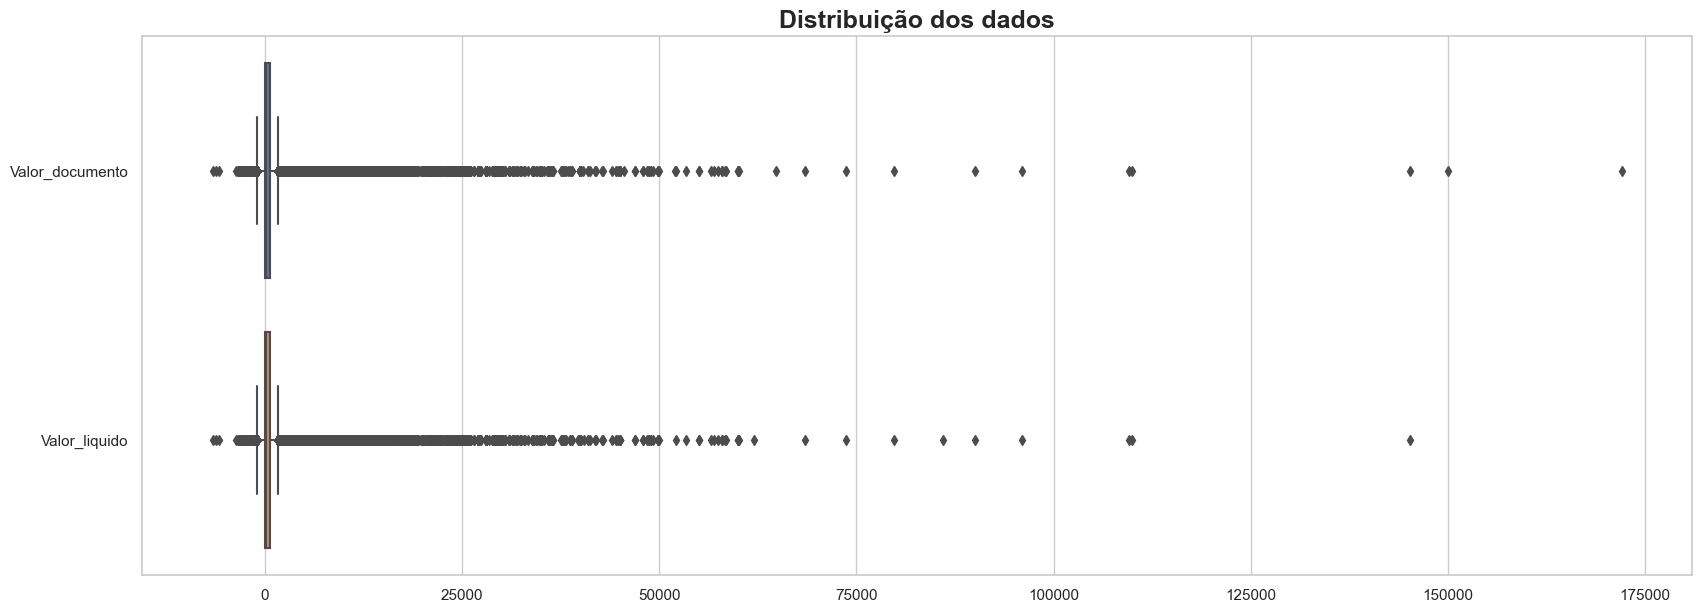

In [157]:
# Plotagem de um bloxplot para melhor analise . 
fig, ax = plt.subplots(figsize=(20,7))
sns.boxplot(data=df[['Valor_documento','Valor_liquido']], orient='h')
ax.set_title('Distribuição dos dados', fontdict={'fontsize':18, 'fontweight': 'bold'})
plt.show()

#### Vizualizando a dispersao seria interessante identificar quem sao esse valores extremos e analiza-los .

Valor extremo:                   Parlamentar  Uf Partido  \
110964  Professora Marcivania  AP   PCdoB   

                                   Descricao  Valor_glosa  Valor_documento  \
110964  DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR.      86000.0         172000.0   

        Valor_liquido  Mes  
110964        86000.0    1  


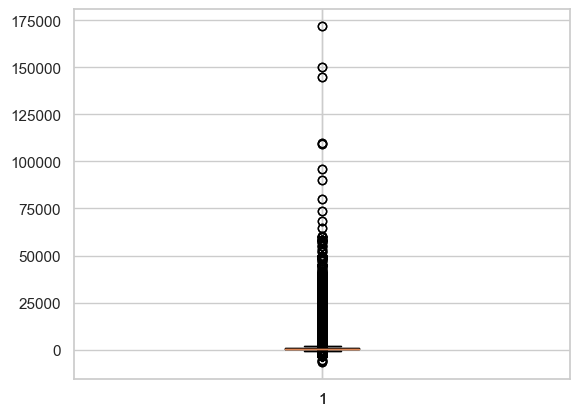

In [158]:
# Identificando quem sao os valores extremos do boxplot em valor_documento .
plt.boxplot(df['Valor_documento'])
outliers = plt.boxplot(df['Valor_documento'])['fliers'][0].get_data()[1]
outlier_value = outliers.max()
extreme_value = df.loc[df['Valor_documento'] == outlier_value]
print("Valor extremo:", extreme_value)

Valor extremo:          Parlamentar  Uf Partido                             Descricao  \
88720  Weliton Prado  MG    PROS  DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR.   

       Valor_glosa  Valor_documento  Valor_liquido  Mes  
88720          0.0         145140.0       145140.0   12  


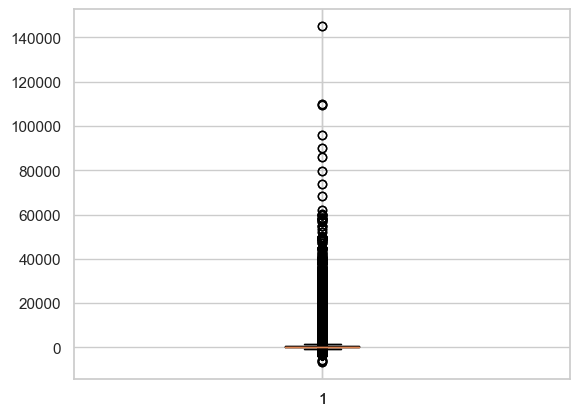

In [159]:
# Identificando quem sao os valores extremos do boxplot em valor_liquido .
plt.boxplot(df['Valor_liquido'])
outliers = plt.boxplot(df['Valor_liquido'])['fliers'][0].get_data()[1]
outlier_value = outliers.max()
extreme_value = df.loc[df['Valor_liquido'] == outlier_value]
print("Valor extremo:", extreme_value)

### Analisando os parlamentares que sao os valores extremos . 

#### Professora Marcivania     PCdoB Amapá

In [160]:
# Filtro exibe as informaçoes especificas da parlamentar selecionado . 
pm = df[df['Parlamentar'] == 'Professora Marcivania']  
pm.describe(include='all').round()

,Parlamentar,Uf,Partido,Descricao,Valor_glosa,Valor_documento,Valor_liquido,Mes
count,196,196,196,196,196.0,196.0,196.0,196.0
unique,1,1,1,11,NaN,NaN,NaN,NaN
top,Professora Marcivania,AP,PCdoB,PASSAGEM AÉREA - RPA,NaN,NaN,NaN,NaN
freq,196,196,196,92,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,439.0,2967.0,2528.0,6.0
std,NaN,NaN,NaN,NaN,6143.0,13283.0,8067.0,3.0
min,NaN,NaN,NaN,NaN,0.0,-1859.0,-1859.0,1.0
25%,NaN,NaN,NaN,NaN,0.0,167.0,167.0,3.0
50%,NaN,NaN,NaN,NaN,0.0,823.0,823.0,7.0
75%,NaN,NaN,NaN,NaN,0.0,1770.0,1770.0,9.0


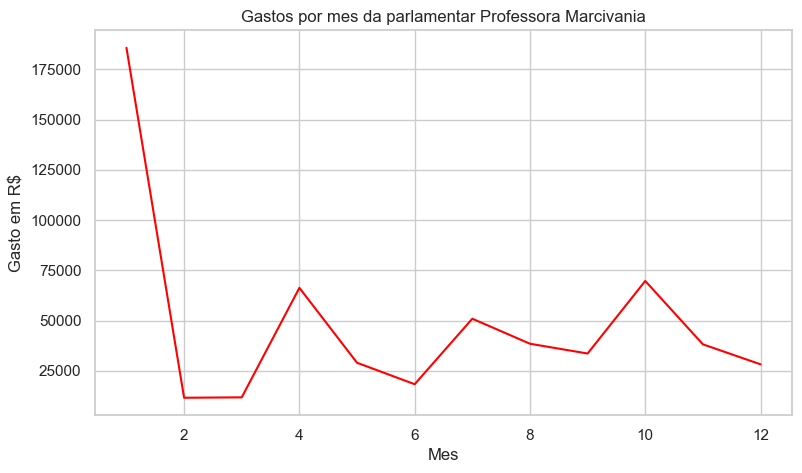

In [161]:
# Plot
plot_pm = pm.groupby('Mes')['Valor_documento'].sum()
plot_pm.plot(title='Gastos por mes da parlamentar Professora Marcivania', color='red', figsize=(9,5), grid=True)
plt.ylabel('Gasto em R$')
plt.xlabel('Mes')
plt.show()

In [162]:
# Filtro de todos os gastos dessa categoria para verificar os valores .
pm[pm['Descricao'] == 'DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR.']

,Parlamentar,Uf,Partido,Descricao,Valor_glosa,Valor_documento,Valor_liquido,Mes
110964,Professora Marcivania,AP,PCdoB,DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR.,86000.0,172000.0,86000.0,1
111052,Professora Marcivania,AP,PCdoB,DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR.,0.0,18000.0,18000.0,12
111053,Professora Marcivania,AP,PCdoB,DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR.,0.0,18000.0,18000.0,4
111054,Professora Marcivania,AP,PCdoB,DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR.,0.0,18000.0,18000.0,5
111055,Professora Marcivania,AP,PCdoB,DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR.,0.0,18000.0,18000.0,8
111056,Professora Marcivania,AP,PCdoB,DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR.,0.0,18000.0,18000.0,9
111057,Professora Marcivania,AP,PCdoB,DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR.,0.0,18000.0,18000.0,11


De acordo com os dados acima na mesma categoria percebece que no mes 1 houve um gasto bem maior que os valores dos outros meses .

In [179]:
pm[pm['Descricao'] == 'DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR.'].describe()

,Valor_glosa,Valor_documento,Valor_liquido,Mes
count,7.000000,7.000000,7.000000,7.000000
mean,12285.714286,40000.000000,27714.285714,7.142857
std,32504.944679,58206.528843,25701.584165,3.976119
min,0.000000,18000.000000,18000.000000,1.000000
25%,0.000000,18000.000000,18000.000000,4.500000
50%,0.000000,18000.000000,18000.000000,8.000000
75%,0.000000,18000.000000,18000.000000,10.000000
max,86000.000000,172000.000000,86000.000000,12.000000


In [163]:
# Excluindo o mes 1 como ficaria os gastos da parlamentar no ano .
pm[(pm['Descricao'] == 'DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR.') & (pm['Mes'] != 1 )].describe() # Filtro tirando o mes 1 do maior gasto.

,Valor_glosa,Valor_documento,Valor_liquido,Mes
count,6.0,6.0,6.0,6.000000
mean,0.0,18000.0,18000.0,8.166667
std,0.0,0.0,0.0,3.188521
min,0.0,18000.0,18000.0,4.000000
25%,0.0,18000.0,18000.0,5.750000
50%,0.0,18000.0,18000.0,8.500000
75%,0.0,18000.0,18000.0,10.500000
max,0.0,18000.0,18000.0,12.000000


Valores gastos no mes 1 chamam atençao por ser bem distante da media dos outros meses .

 Valor extremo 172.000.00 identificado nos dados da parlamentar Professora Marcivania é referente ao ultimo mes de seu segundo mandato como deputada federal pelo estado do AP, no mes de janeiro/2019 , tendo em vista que os parlamentares tomam posse de seus mandatos no mes de fevereiro . <br>
 2° mandato como deputada federal pelo PT naquele ano . <br>
 No mes anterior dezembro/2018 a parlamentar teve o mesmo valor em gastos com divulgaçao de atividade parlamentar.
 Antes disso seu maior consumo de cota na mesma categoria foi de R$31.500,00 em abril/2015 . 

Link do valor identificado do site da camara dos deputados:
https://www.camara.leg.br/cota-parlamentar/sumarizado?nuDeputadoId=2339&dataInicio=1/2019&dataFim=1/2019&despesa=&nomeHospede=&nomePassageiro=&nomeFornecedor=&cnpjFornecedor=&numDocumento=&sguf=&filtroNivel1=1&filtroNivel2=2&filtroNivel3=3


 <img src='https://upload.wikimedia.org/wikipedia/commons/e/e0/Congressos._Semin%C3%A1rios._Palestras_%2836640249961%29.jpg'>
 
Mandatos (na Câmara dos Deputados):
Deputado(a) Federal - 2011-2015, AP, PT, Dt. Posse: 01/02/2011; Deputado(a) Federal - 2015-2019, AP, PT, Dt. Posse: 01/02/2015; Deputado(a) Federal - 2019-2023, AP, PCdoB, Dt. Posse: 01/02/2019.

####                                                                        Weliton Prado 

In [164]:
# Parlamentar Weliton Prado PROS de Minas Gerais
wp = df[df['Parlamentar'] == 'Weliton Prado']
wp.describe(include='all').round()

,Parlamentar,Uf,Partido,Descricao,Valor_glosa,Valor_documento,Valor_liquido,Mes
count,241,241,241,241,241.0,241.0,241.0,241.0
unique,1,1,1,7,NaN,NaN,NaN,NaN
top,Weliton Prado,MG,PROS,PASSAGEM AÉREA - RPA,NaN,NaN,NaN,NaN
freq,241,241,241,104,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,2.0,1698.0,1696.0,7.0
std,NaN,NaN,NaN,NaN,25.0,9446.0,9445.0,3.0
min,NaN,NaN,NaN,NaN,0.0,-468.0,-468.0,1.0
25%,NaN,NaN,NaN,NaN,0.0,182.0,182.0,4.0
50%,NaN,NaN,NaN,NaN,0.0,634.0,634.0,8.0
75%,NaN,NaN,NaN,NaN,0.0,1042.0,1042.0,10.0


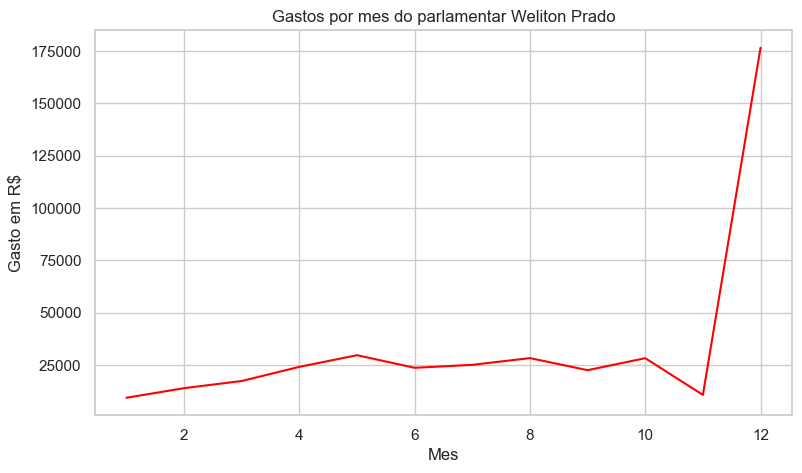

In [165]:
plot_wp = wp.groupby('Mes')['Valor_liquido'].sum()
plot_wp.plot(title='Gastos por mes do parlamentar Weliton Prado', color='red', figsize=(9,5), grid=True)
plt.ylabel('Gasto em R$')
plt.xlabel('Mes')
plt.show()

In [166]:
# FIltro para identificar todos os gastos do parlamentar daquela categoria .
wp[wp['Descricao'] == 'DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR.']


,Parlamentar,Uf,Partido,Descricao,Valor_glosa,Valor_documento,Valor_liquido,Mes
88720,Weliton Prado,MG,PROS,DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR.,0.00,145140.00,145140.00,12
88721,Weliton Prado,MG,PROS,DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR.,0.00,600.00,600.00,9
88722,Weliton Prado,MG,PROS,DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR.,0.00,1425.00,1425.00,3
88723,Weliton Prado,MG,PROS,DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR.,0.00,499.93,499.93,2
88724,Weliton Prado,MG,PROS,DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR.,0.00,7928.12,7928.12,5
88725,Weliton Prado,MG,PROS,DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR.,0.00,9694.07,9694.07,6
88726,Weliton Prado,MG,PROS,DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR.,0.00,12656.50,12656.50,7
88727,Weliton Prado,MG,PROS,DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR.,0.00,5047.49,5047.49,9
88728,Weliton Prado,MG,PROS,DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR.,0.00,5583.91,5583.91,12
88729,Weliton Prado,MG,PROS,DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR.,0.00,4786.44,4786.44,12


In [188]:
#Resumo estatistico dos seus gastos
wp[wp['Descricao'] == 'DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR.'].describe() 

,Valor_glosa,Valor_documento,Valor_liquido,Mes
count,20.000000,20.000000,20.000000,20.000000
mean,19.202000,11915.619500,11896.417500,7.500000
std,85.873955,31581.212674,31583.848834,3.236307
min,0.000000,400.000000,400.000000,2.000000
25%,0.000000,1256.250000,1256.250000,4.750000
50%,0.000000,4937.710000,4937.710000,8.000000
75%,0.000000,7940.840000,7678.250000,9.250000
max,384.040000,145140.000000,145140.000000,12.000000


In [187]:
#Soma de seus gastos no mes 12
wp[(wp['Descricao'] == 'DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR.') & (wp['Mes'] == 12 )].sum()

Parlamentar        Weliton PradoWeliton PradoWeliton PradoWeliton...
Uf                                                          MGMGMGMG
Partido                                             PROSPROSPROSPROS
Descricao          DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR.DIVULGAÇÃO...
Valor_glosa                                                      0.0
Valor_documento                                            163070.35
Valor_liquido                                              163070.35
Mes                                                               48
dtype: object

Como vimos acima o parlamentar Weliton Prado tem uma variaçao maior de gastos nessa categoria e uso mais recorrente de divulgaçao 
de atividade parlamentar . <br>
Chama atençao o gasto no mes 12 que foi bem maior que os outros meses. <br>
Somente em dezembro do ano de 2019 foi um total de 163.070,35 como foi detalhado no dado anterior .


In [184]:
#Resumo estatistico excluindo mes 12
wp[(wp['Descricao'] == 'DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR.') & (wp['Mes'] != 12 )].describe() 

,Valor_glosa,Valor_documento,Valor_liquido,Mes
count,16.0000,16.000000,16.000000,16.000000
mean,24.0025,4702.627500,4678.625000,6.375000
std,96.0100,4155.543294,4136.422397,2.552776
min,0.0000,400.000000,400.000000,2.000000
25%,0.0000,712.500000,712.500000,4.000000
50%,0.0000,3988.965000,3988.965000,6.500000
75%,0.0000,7940.840000,7678.250000,9.000000
max,384.0400,12656.500000,12656.500000,10.000000


In [185]:
# Soma dos valores gastos excluindo o mes12
wp[(wp['Descricao'] == 'DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR.') & (wp['Mes'] != 12 )].sum()

Parlamentar        Weliton PradoWeliton PradoWeliton PradoWeliton...
Uf                                  MGMGMGMGMGMGMGMGMGMGMGMGMGMGMGMG
Partido            PROSPROSPROSPROSPROSPROSPROSPROSPROSPROSPROSPR...
Descricao          DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR.DIVULGAÇÃO...
Valor_glosa                                                   384.04
Valor_documento                                             75242.04
Valor_liquido                                                74858.0
Mes                                                              102
dtype: object

Percebe-se uma variaçao muito alta de gastos em dezembro em relaçao aos outros meses .<br>
Somente o valor gasto no mes 12 é maior que todo o resto do ano somados .

<img src='https://www.camara.leg.br/internet/deputado/bandep/pagina_do_deputado/160518.jpg'>

Mandatos (na Câmara dos Deputados):
Deputado(a) Federal - 2011-2015, MG, PT, Dt. Posse: 01/02/2011; Deputado(a) Federal - 2015-2019, MG, PT, Dt. Posse: 01/02/2015; Deputado(a) Federal - 2019-2023, MG, PROS, Dt. Posse: 01/02/2019; Deputado(a) Federal - 2023-2027, MG, PROS, Dt. Posse: 01/02/2023.

#### Agora que temos um pouco mais de conhecimento da base de dados , podemos responder a algumas perguntas interessantes que podem ser feitas em relação aos gastos de cota parlamentar .

#### Quais parlamentares mais usaram a cota no ano de 2019 ?

### TOP 5

Parlamentar
Professora Marcivania    581466.42
Jhonatan de Jesus        556965.71
Hiran Gonçalves          543123.22
Afonso Motta             542530.66
Perpétua Almeida         540576.67
Name: Valor_documento, dtype: float64


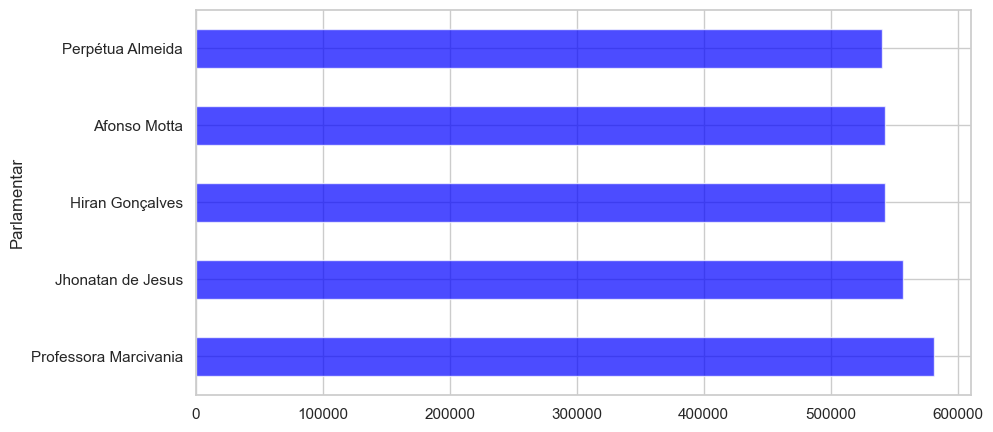

In [169]:
# Agrupando pelo nome do parlamentar e somando seus gastos
maiores_gastos = df.groupby('Parlamentar')['Valor_documento'].sum().sort_values(ascending=False).head(5)
print(maiores_gastos)
maiores_gastos.head(5).plot(kind='barh', figsize=(10,5), color='blue', alpha=0.7)
plt.show()

#### Quais parlamentares usaram menos a cota parlamentar em 2019 ?

In [170]:
menores_gastos = df.groupby('Parlamentar')['Valor_documento'].sum().sort_values().head(5)
menores_gastos

Parlamentar
FELIPE BORNIER    -1675.06
LUCIANA SANTOS        0.49
MANDETTA              0.60
SARNEY FILHO          1.25
Geraldo Resende       1.40
Name: Valor_documento, dtype: float64

#### Segundo a explicação dos dados disponível no site da câmara quando houver valores negativos : <br>
"(...)Quando se tratar de bilhete aéreo, esse valor poderá ser negativo, significando que o referido bilhete é um bilhete de compensação, pois compensa um outro bilhete emitido e não utilizado pelo deputado ."

#### Categorias com mais despesas .

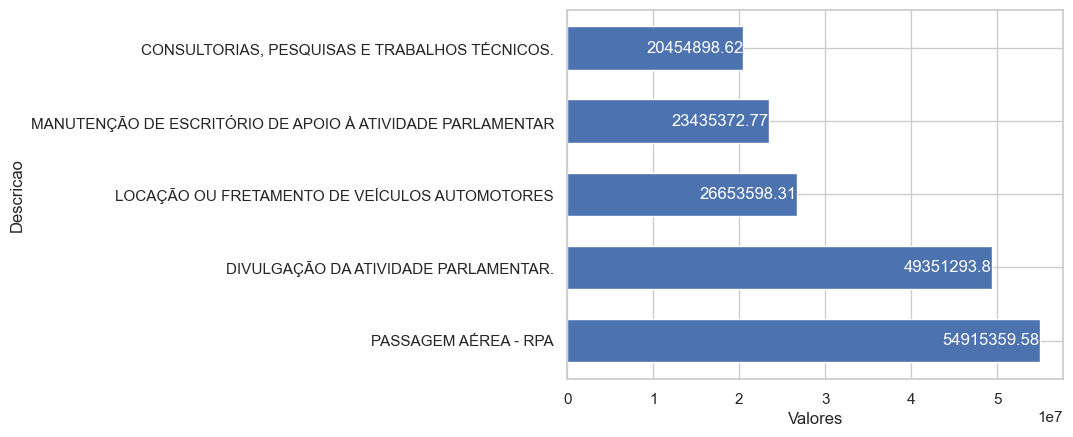

In [171]:
cat_mais_gastos = df.groupby('Descricao')['Valor_documento'].sum().sort_values(ascending=False).nlargest(5)

fig, ax = plt.subplots()
ax.barh(cat_mais_gastos.index, cat_mais_gastos.values, height=0.6)
ax.set_xlabel('Valores')
ax.set_ylabel('Descricao')

# Inserindo os valores nas barras
for i, v in enumerate(cat_mais_gastos.values):
    ax.annotate(str(v), xy=(v, i), va='center', ha='right', color='white')
plt.show()

#### Estados que mais gastaram com cotas parlamentares .

Uf
SP    25801185.67
MG    19651132.18
RJ    17981805.67
BA    17603803.91
RS    12582357.73
Name: Valor_documento, dtype: float64


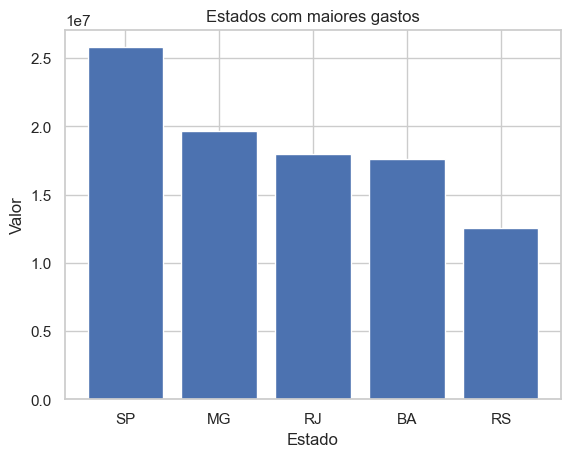

In [172]:
gasto_estado = df.groupby('Uf')['Valor_documento'].sum().sort_values(ascending=False).nlargest(5)
print(gasto_estado)

plt.bar(gasto_estado.index, gasto_estado.values)
plt.title('Estados com maiores gastos')
plt.xlabel('Estado')
plt.ylabel('Valor')
plt.show()

#### Partidos que mais usaram cota 

Partido
PL       27132670.30
PT       24779949.50
PP       22336061.74
UNIÃO    20296199.79
PSD      18763118.47
Name: Valor_documento, dtype: float64


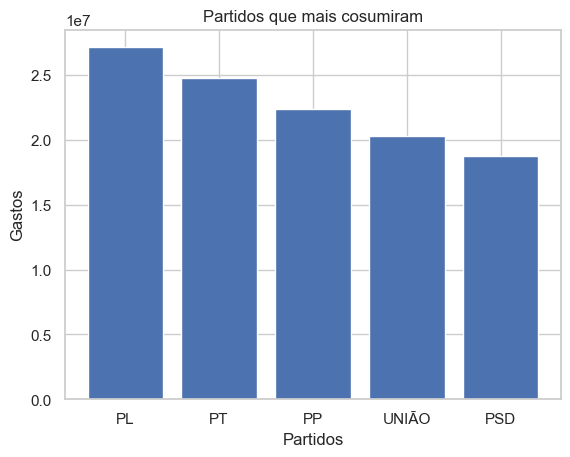

In [189]:
piores_partidos = df.groupby('Partido')['Valor_documento'].sum().sort_values(ascending=False).nlargest(5)
print(piores_partidos)
plt.bar(piores_partidos.index, piores_partidos.values)
plt.title('Partidos que mais cosumiram')
plt.xlabel('Partidos')
plt.ylabel('Gastos')
plt.show()

#### Quais os parlamentares que mais pediram cota .

In [174]:
df.value_counts('Parlamentar').nlargest() #Top5

Parlamentar
Diego Garcia        1735
Zeca Dirceu         1631
Maria do Rosário    1540
Glauber Braga       1489
Jorge Solla         1425
dtype: int64

In [175]:
df.query("Parlamentar == 'Diego Garcia'").sort_values('Valor_documento', ascending=False)

,Parlamentar,Uf,Partido,Descricao,Valor_glosa,Valor_documento,Valor_liquido,Mes
146750,Diego Garcia,PR,REPUBLICANOS,DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR.,0.0,5400.00,5400.00,6
146360,Diego Garcia,PR,REPUBLICANOS,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,0.0,3510.00,3510.00,5
146764,Diego Garcia,PR,REPUBLICANOS,DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR.,0.0,2800.00,2800.00,7
147002,Diego Garcia,PR,REPUBLICANOS,LOCAÇÃO OU FRETAMENTO DE VEÍCULOS AUTOMOTORES,0.0,2500.00,2500.00,2
147008,Diego Garcia,PR,REPUBLICANOS,LOCAÇÃO OU FRETAMENTO DE VEÍCULOS AUTOMOTORES,0.0,2500.00,2500.00,5
...,...,...,...,...,...,...,...,...
147147,Diego Garcia,PR,REPUBLICANOS,"SERVIÇO DE TÁXI, PEDÁGIO E ESTACIONAMENTO",0.0,4.00,4.00,11
147146,Diego Garcia,PR,REPUBLICANOS,"SERVIÇO DE TÁXI, PEDÁGIO E ESTACIONAMENTO",0.0,4.00,4.00,10
147074,Diego Garcia,PR,REPUBLICANOS,"SERVIÇO DE TÁXI, PEDÁGIO E ESTACIONAMENTO",0.0,2.70,2.70,8
147073,Diego Garcia,PR,REPUBLICANOS,"SERVIÇO DE TÁXI, PEDÁGIO E ESTACIONAMENTO",0.0,2.70,2.70,8


<img src='https://www.camara.leg.br/internet/deputado/bandep/pagina_do_deputado/178929.jpg'> <br>
O parlamentar que mais revindicou a cota foi o Diego Garcia do Republicanos, tendo registrado 1735 reembolsos. Apesar da grande quantidade de revindicações, os maiores gastos não foram desse parlamentar, como visto anteriormente.

É comum vermos casos de parlamentares que gastam mais em determinado mês em relação a outros meses. Essas variações nos gastos podem ocorrer por diversos motivos, como viagens oficiais, participação em eventos, despesas com equipe, entre outros.

No entanto, é importante que esses gastos sejam justificados e estejam de acordo com as normas protegidas para o uso de recursos públicos. Os parlamentares têm o dever de prestar contas dos recursos que utilizam em nome do povo, e qualquer irregularidade deve ser investigada e punida.

Além disso, é necessário que haja transparência na divulgação dessas despesas para que a população possa acompanhar e fiscalizar o uso dos recursos públicos por seus representantes. A transparência é uma ferramenta fundamental para garantir a confiança da sociedade nas instituições e na democracia como um todo.

Portanto, é importante que os parlamentares ajam com responsabilidade no uso dos recursos públicos e que as pessoas estejam preparadas para fiscalizar e investigar irregularidades, garantindo a transparência e a integridade do processo democrático.